In [1]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect('database.db')

In [3]:
csr = con.cursor()

## SKEMA SNOWFLAKE SAN FRANCISCO LIBRARY USAGE

![snowflake.jpg](snowflake.jpg)
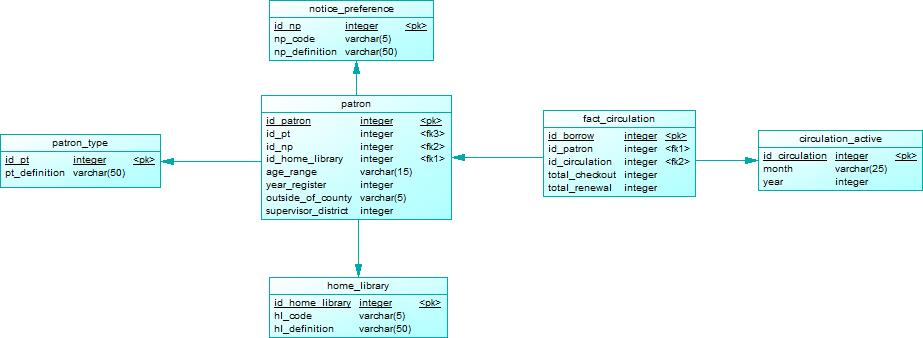

In [4]:
csr.executescript('drop table if exists circulation_active')
csr.executescript('drop table if exists notice_preference')
csr.executescript('drop table if exists patron_type')
csr.executescript('drop table if exists home_library')
csr.executescript('drop table if exists patron')
csr.executescript('drop table if exists fact_circulation')
csr.execute("CREATE TABLE IF NOT EXISTS 'circulation_active' ('id_circulation' INT, 'id_month' INT, 'year' INT, PRIMARY KEY('id_circulation'), FOREIGN KEY('id_month') REFERENCES month('id_month'))")
csr.execute("CREATE TABLE IF NOT EXISTS 'notice_preference' ('id_np' INT, 'np_code' VARCHAR(5), 'np_definition' VARCHAR(50), PRIMARY KEY('id_np'))")
csr.execute("CREATE TABLE IF NOT EXISTS 'patron_type' ('id_pt' INT, 'pt_definition' VARCHAR(50), PRIMARY KEY('id_pt'))")
csr.execute("CREATE TABLE IF NOT EXISTS 'home_library' ('id_home_library' INT, 'hl_code' VARCHAR(10), 'hl_definition' VARCHAR(100), PRIMARY KEY('id_home_library'))")
csr.execute("CREATE TABLE IF NOT EXISTS 'patron' ('id_patron' INT, 'id_pt' INT, 'id_np' INT, 'id_home_library' INT, 'age_range' VARCHAR(15), 'year_register' INT, 'outside_of_county' VARCHAR(5), 'supervisor_district' INT, PRIMARY KEY('id_patron'), FOREIGN KEY('id_pt') REFERENCES patron_type('id_pt'), FOREIGN KEY('id_np') REFERENCES notice_preference('id_np'), FOREIGN KEY('id_home_library') REFERENCES home_library('id_home_library'))")
csr.execute("CREATE TABLE IF NOT EXISTS 'fact_circulation' ('id_borrow' INT, 'id_patron' INT, 'id_circulation' INT, 'total_checkout' INT, 'total_renewal' INT, PRIMARY KEY('id_borrow'), FOREIGN KEY('id_patron') REFERENCES patron('id_patron'), FOREIGN KEY('id_circulation') REFERENCES circulation_active('id_circulation'))")

In [5]:
ds = pd.read_csv("Library_Usage.csv")
ds

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,1552,1184,25 to 34 years,O7,Ortega,January,2016,z,email,True,2003,False,NaN
1,0,ADULT,15,9,60 to 64 years,W2,West Portal,January,2016,z,email,True,2003,False,7.0
2,0,ADULT,77,47,60 to 64 years,X,Main Library,January,2016,z,email,True,2003,False,5.0
3,0,ADULT,173,204,60 to 64 years,B4,Bernal Heights,January,2016,z,email,True,2003,False,9.0
4,0,ADULT,40,3,45 to 54 years,B4,Bernal Heights,January,2016,z,email,True,2003,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147896,0,ADULT,535,87,65 to 74 years,E7,Eureka Valley/Harvey Milk Memorial,July,2016,z,email,True,2003,False,4.0
147897,1,JUVENILE,372,1,10 to 19 years,C2,Chinatown,July,2016,a,print,False,2013,False,3.0
147898,0,ADULT,1342,1443,20 to 24 years,W2,West Portal,July,2016,z,email,True,2007,False,NaN
147899,1,JUVENILE,961,494,10 to 19 years,X,Main Library,July,2016,z,email,True,2008,True,NaN


In [6]:
circulation_active = []
notice_preference = []
patron_type = []
home_library = []

for i,j in ds.iterrows():
        
    if [j[7],j[8]] not in circulation_active:
        circulation_active.append([j[7],j[8]])
        
    if [j[5], j[6]] not in home_library:
        home_library.append([j[5], j[6]])
        
    if[j[0], j[1]] not in patron_type:
        patron_type.append([j[0], j[1]])

    if[j[9],j[10]] not in notice_preference:
        notice_preference.append([j[9], j[10]])

print('=========== CA ==============')
print(circulation_active)
print('=========== HL ==============')
print(home_library)
print('=========== PT ==============')
print(patron_type)
print('=========== NP ==============')
print(notice_preference)

=========== CA ==============
[['January', 2016], ['February', 2016], ['March', 2016], ['April', 2016], ['May', 2016], ['June', 2016], ['July', 2016]]
=========== HL ==============
[['O7', 'Ortega'], ['W2', 'West Portal'], ['X', 'Main Library'], ['B4', 'Bernal Heights'], ['E9', 'Excelsior'], ['I5', 'Ingleside'], ['C2', 'Chinatown'], ['G6', 'Golden Gate Valley'], ['P3', 'Parkside'], ['P1', 'Park'], ['G4', 'Glen Park'], ['M8', 'Mission Bay'], ['N4', 'Noe Valley/Sally Brunn'], ['P5', 'Portola'], ['M4', 'Merced'], ['P9', 'Presidio'], ['V3', 'Visitacion Valley'], ['W4', 'Western Addition'], ['R3', 'Richmond'], ['A5', 'Anza'], ['S7', 'Sunset'], ['M2', 'Marina'], ['N6', 'North Beach'], ['M6', 'Mission'], ['B2', 'Bayview/Linda Brooks-Burton'], ['E7', 'Eureka Valley/Harvey Milk Memorial'], ['P7', 'Potrero'], ['O2', 'Ocean View'], ['R3J', 'Unknown'], ['YJJ', "Children's Bookmobile"], ['YLW', 'Library on Wheels'], ['YB', 'Unknown'], ['YB2', 'Branch Bookmobile (West Portal)'], ['XFFL', 'Unknown'],

In [7]:
patron = []
for i,j in ds.iterrows():
    nop = -1
    for index, value in enumerate(notice_preference):
        if value[0] == j[9]:
            nop = index+1
            break
    
    pt = -1
    for index, value in enumerate(patron_type):
        if value[0] == j[0]:
            pt = index+1
            break
    
    hl = -1
    for index, value in enumerate(home_library):
        if value[0] == j[5]:
            hl = index+1
            break
    
    if [j[4], j[12], j[13], j[14]] not in patron:
        patron.append([nop, pt, hl, j[4], j[12], j[13], j[14]])

print(patron)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
fact_circulation = []
for i,j in ds.iterrows():
    p = -1
    for index, value in enumerate(patron):
        if value[4] == j[12]:
            p = index+1
            break
    
    c = -1
    for index, value in enumerate(circulation_active):
        if value[0] == j[7]:
            c = index+1
            break

    if [j[2], j[3]] not in fact_circulation:
        fact_circulation.append([p, c, j[2], j[3]])

In [10]:
csr.execute("DELETE FROM CIRCULATION_ACTIVE")
for index, i in enumerate(circulation_active):
    csr.execute("INSERT INTO CIRCULATION_ACTIVE VALUES("+ str(index+1) + ", '"+ str(i[0]) +"', '"+ str(i[1]) + "')")
    
csr.execute("DELETE FROM PATRON_TYPE")
for index, i in enumerate(patron_type):
    csr.execute("INSERT INTO PATRON_TYPE VALUES('"+ str(i[0]) +"', '"+ str(i[1]) +"')")
    
csr.execute("DELETE FROM notice_preference")
for index, i in enumerate(notice_preference):
    csr.execute("INSERT INTO notice_preference VALUES("+ str(index+1) + ", '"+ str(i[0]) +"', '"+ str(i[1]) +"')")

In [11]:
csr.execute("SELECT * FROM notice_preference")

coba = []
for row in csr.fetchall():
    coba.append(row)

print(coba)

[(1, 'z', 'email'), (2, 'p', 'phone'), (3, 'a', 'print'), (4, '-', 'none')]


In [12]:
csr.execute("DELETE FROM home_library")
for index, i in enumerate(home_library):
    code = i[0]
    defi = i[1]
    csr.execute("INSERT INTO home_library VALUES("+ str(index+1) +",?,?)", (code, defi,))

In [13]:
csr.execute("SELECT * FROM home_library")

coba2 = []
for row in csr.fetchall():
    coba2.append(row)

print(coba2)

[(1, 'O7', 'Ortega'), (2, 'W2', 'West Portal'), (3, 'X', 'Main Library'), (4, 'B4', 'Bernal Heights'), (5, 'E9', 'Excelsior'), (6, 'I5', 'Ingleside'), (7, 'C2', 'Chinatown'), (8, 'G6', 'Golden Gate Valley'), (9, 'P3', 'Parkside'), (10, 'P1', 'Park'), (11, 'G4', 'Glen Park'), (12, 'M8', 'Mission Bay'), (13, 'N4', 'Noe Valley/Sally Brunn'), (14, 'P5', 'Portola'), (15, 'M4', 'Merced'), (16, 'P9', 'Presidio'), (17, 'V3', 'Visitacion Valley'), (18, 'W4', 'Western Addition'), (19, 'R3', 'Richmond'), (20, 'A5', 'Anza'), (21, 'S7', 'Sunset'), (22, 'M2', 'Marina'), (23, 'N6', 'North Beach'), (24, 'M6', 'Mission'), (25, 'B2', 'Bayview/Linda Brooks-Burton'), (26, 'E7', 'Eureka Valley/Harvey Milk Memorial'), (27, 'P7', 'Potrero'), (28, 'O2', 'Ocean View'), (29, 'R3J', 'Unknown'), (30, 'YJJ', "Children's Bookmobile"), (31, 'YLW', 'Library on Wheels'), (32, 'YB', 'Unknown'), (33, 'YB2', 'Branch Bookmobile (West Portal)'), (34, 'XFFL', 'Unknown'), (35, 'YB8', 'Unknown'), (36, 'YB7', 'Unknown'), (37, 

In [14]:
csr.execute("DELETE FROM PATRON")
for index, i in enumerate(patron):
    id_pt = i[0]
    id_np = i[1]
    id_home_library = i[2]
    csr.execute("INSERT INTO PATRON VALUES("+ str(index+1) + ", '"+ str(id_pt) +"', '"+ str(id_np) + "', '"+ str(id_home_library) + "', '"+ str(i[3]) + "', '"+ str(i[4]) + "', '"+ str(i[5]) +"', '"+ str(i[6]) +"')")

csr.execute("DELETE FROM FACT_CIRCULATION")
for index, i in enumerate(fact_circulation):
    id_patron = i[0]
    id_circulation = i[1]
    csr.execute("INSERT INTO FACT_CIRCULATION VALUES("+ str(index+1) + ", '"+ str(id_patron) +"', '"+ str(id_circulation) + "', '"+ str(i[2]) + "', '"+ str(i[3]) + "')")
con.commit()

In [15]:
csr.execute("SELECT * FROM fact_circulation ")

circulation = []
for row in csr.fetchall():
    circulation.append(row)

print(circulation)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[('January', 1178581), ('February', 1095263), ('March', 1370631), ('April', 1665534), ('May', 2717945), ('June', 5286850), ('July', 35299580)]


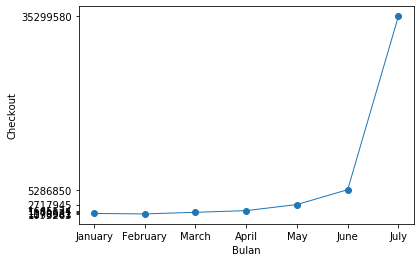

In [16]:
csr.execute('''select circulation_active.id_month, sum(fact_circulation.total_checkout) from
circulation_active join fact_circulation on circulation_active.id_circulation = fact_circulation.id_circulation
group by id_month
ORDER BY 
  CASE ID_MONTH
    WHEN 'January' THEN 0
    WHEN 'February' THEN 1
    WHEN 'March' THEN 2
    WHEN 'April' THEN 3
    WHEN 'May' THEN 4
    WHEN 'June' THEN 5
    WHEN 'July' THEN 7
  END
''')

peminjaman = []
for row in csr.fetchall():
    peminjaman.append(row)
    
print(peminjaman)

np_peminjaman = np.array(peminjaman)

ds = pd.DataFrame(np_peminjaman)
ds.columns = ['Bulan', 'Peminjaman']
ds.index = np.arange(1,len(ds)+1)
ds


plt.plot([ str(x[0]) for x in np_peminjaman[:,:]], [ int(x[1]) for x in np_peminjaman[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_peminjaman[:,:]], [ str(x[0]) for x in np_peminjaman[:,:]])
plt.yticks([ int(x[1]) for x in np_peminjaman[:,:]], [ int(x[1]) for x in np_peminjaman[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Checkout')
plt.show()

## TAMBAHAN
Menampilkan data jumlah renewal dan jumlah patron dalam 1 plot

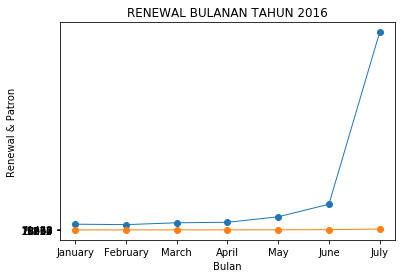

,Bulan,Pembaruan,Patron
1,January,411432,8254
2,February,380330,8136
3,March,510949,10017
4,April,545770,10860
5,May,932445,15272
6,June,1816855,23909
7,July,13934307,71453


In [26]:
csr.execute('''select circulation_active.id_month, sum(fact_circulation.total_renewal), count(fact_circulation.id_patron)
from circulation_active join fact_circulation on circulation_active.id_circulation = fact_circulation.id_circulation
group by id_month
ORDER BY 
  CASE ID_MONTH
    WHEN 'January' THEN 0
    WHEN 'February' THEN 1
    WHEN 'March' THEN 2
    WHEN 'April' THEN 3
    WHEN 'May' THEN 4
    WHEN 'June' THEN 5
    WHEN 'July' THEN 7
  END
''')

pembaruan = []
for row in csr.fetchall():
    pembaruan.append(row)

np_pembaruan = np.array(pembaruan)
plt.plot([ str(x[0]) for x in np_pembaruan[:,:]], [ int(x[1]) for x in np_pembaruan[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_pembaruan[:,:]], [ str(x[0]) for x in np_pembaruan[:,:]])
plt.yticks([ int(x[1]) for x in np_pembaruan[:,:]], [ int(x[1]) for x in np_pembaruan[:,:]])

plt.plot([ str(x[0]) for x in np_pembaruan[:,:]], [ int(x[2]) for x in np_pembaruan[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_pembaruan[:,:]], [ str(x[0]) for x in np_pembaruan[:,:]])
plt.yticks([ int(x[2]) for x in np_pembaruan[:,:]], [ int(x[2]) for x in np_pembaruan[:,:]])

plt.title('RENEWAL BULANAN TAHUN 2016')
plt.xlabel('Bulan')
plt.ylabel('Renewal & Patron')
plt.show()
           
ds = pd.DataFrame(np_pembaruan)
ds.columns = ['Bulan', 'Pembaruan','Patron']
ds.index = np.arange(1,len(ds)+1)
ds